# Plot Gini importance plots for all fuels and individual fuels
Last updated: Kevin Varga, 11/27/2024

**Inputs:**
* Fuel specific random forest models

**Outputs:**
* Gini-importance plot showing importance of all predictors for each fuel type

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import joblib

In [3]:
rf_path = '/home/sbarc/students/varga/nasa/ch1/data/random_forest/'
pred_path = '/home/sbarc/students/varga/nasa/ch1/data/site_predictors/'
fuel_list = list(Path(pred_path).glob('*.csv'))
output_path = '/home/sbarc/students/varga/nasa/ch1/figures/random_forest/'

In [16]:
# Create list to save all fuel types
fuels = []

for i, file in enumerate(fuel_list):
    # Read in the fuel type LFM observations and associated predictor variables
    pre_features = pd.read_csv(file, index_col=[0,1], parse_dates=True, infer_datetime_format=True)
    # Identify the fuel type and save to list
    fuel_type = pre_features['fuel'].iloc[0]
    fuels.append(fuel_type)
    # Drop non-predictor variable columns
    pre_features.drop(columns=['latitude', 'longitude', 'percent', 'fuel'], inplace=True)
    # Read in fuel specific random forest model
    fuel_rf = joblib.load(rf_path + fuel_type + '.rf.joblib')
    # Extract importance values from model and sort
    importances = list(sorted(fuel_rf.feature_importances_, reverse=True))
    # Calculate importance value error ranges
    importance_error = np.std([tree.feature_importances_ for tree in fuel_rf.estimators_], axis=0)
    # Create dataframe to store fuel specific importance values and errors
    if i == 0:
        feat_importances = pd.DataFrame({(fuel_type+'_importance'): fuel_rf.feature_importances_, (fuel_type+'_error'): importance_error}, 
                                         index=pre_features.columns)
        #feat_importances = feat_importances.sort_values(by='importance',ascending=False)
    # Save the rest of the fuel type importance values and errors
    else:
        feat_importances.loc[:, (fuel_type+'_importance')] = fuel_rf.feature_importances_
        feat_importances.loc[:, (fuel_type+'_error')] = importance_error

In [20]:
# Create desired column order
col_order = ['chamise_importance','chamise_error','chamise_old_growth_importance','chamise_old_growth_error',
             'sage_black_importance','sage_black_error','ceanothus_bigpod_importance','ceanothus_bigpod_error']

# Sort dataframe by chamise importance and column order
feat_importances = feat_importances.sort_values(by='chamise_importance',ascending=False)
feat_importances = feat_importances[col_order]

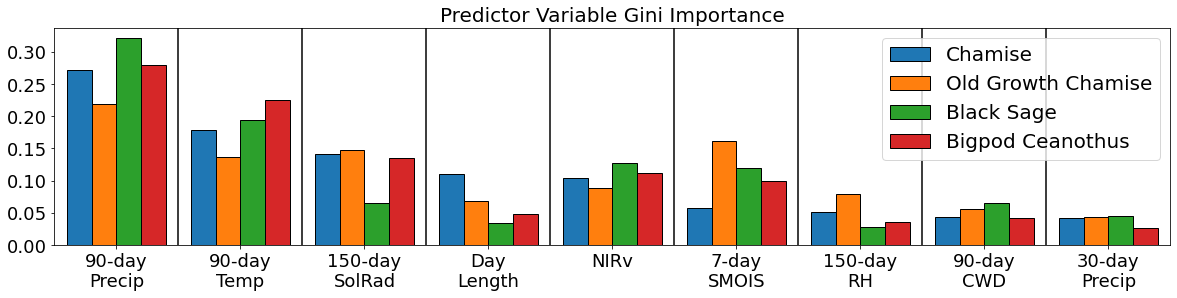

In [14]:
# Plot importance values for all fuel types
plt.figure(figsize=(20,4))

# List of x locations for plotting
x_values = np.arange(len(feat_importances.index))
# Set x-labels
x_labels = ['90-day\nPrecip','90-day\nTemp','150-day\nSolRad','Day\nLength','NIRv',
            '7-day\nSMOIS','150-day\nRH','90-day\nCWD','30-day\nPrecip']

# Plot barplots with error whiskers
# Define error bar style
#error_config = {'lw': 1, 'capsize': 3, 'capthick': 1}

# Calculate the bottom values for the error bars, would need fuel specific loop
#bottom_values = [max(0, feat_importances['importance'].iloc[i] - feat_importances['error'].iloc[i]) for i in range(len(feat_importances))]

#plt.bar(x_values-0.3, feat_importances['chamise_importance'], 0.2, orientation = 'vertical',
#        yerr=feat_importances['chamise_error'], linewidth=1, edgecolor='black', 
#        error_kw=error_config, label='Chamise')
#plt.bar(x_values-0.1, feat_importances['chamise_old_growth_importance'],0.2, orientation = 'vertical',
#        yerr=feat_importances['chamise_old_growth_error'], linewidth=1, edgecolor='black', 
#        error_kw=error_config, label='Old Growth Chamise')
#plt.bar(x_values+0.1, feat_importances['sage_black_importance'],0.2, orientation = 'vertical',
#        yerr=feat_importances['sage_black_error'], linewidth=1, edgecolor='black', 
#        error_kw=error_config, label='Black Sage')
#plt.bar(x_values+0.3, feat_importances['ceanothus_bigpod_importance'],0.2, orientation = 'vertical',
#        yerr=feat_importances['ceanothus_bigpod_error'], linewidth=1, edgecolor='black', 
#        error_kw=error_config, label='Ceanothus')

# Plot barplots without error whiskers
plt.bar(x_values-0.3, feat_importances['chamise_importance'], 0.2, orientation = 'vertical',
        linewidth=1, edgecolor='black', label='Chamise')
plt.bar(x_values-0.1, feat_importances['chamise_old_growth_importance'],0.2, orientation = 'vertical',
        linewidth=1, edgecolor='black', label='Old Growth Chamise')
plt.bar(x_values+0.1, feat_importances['sage_black_importance'],0.2, orientation = 'vertical',
        linewidth=1, edgecolor='black', label='Black Sage')
plt.bar(x_values+0.3, feat_importances['ceanothus_bigpod_importance'],0.2, orientation = 'vertical',
        linewidth=1, edgecolor='black', label='Bigpod Ceanothus')

# Add vertical lines between each x-axis label
for i in range(len(feat_importances.index)-1):
    plt.axvline(x=i + 0.5, color='black', linestyle='-')

# Additional plot parameters
plt.xticks(x_values, x_labels, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(bottom=0)
plt.xlim(x_values[0]-0.5,x_values[-1]+0.5)
plt.legend(fontsize=20)
plt.title('Predictor Variable Gini Importance', fontsize=20);

plt.savefig(output_path + 'all_fuels_importances.png', bbox_inches='tight')

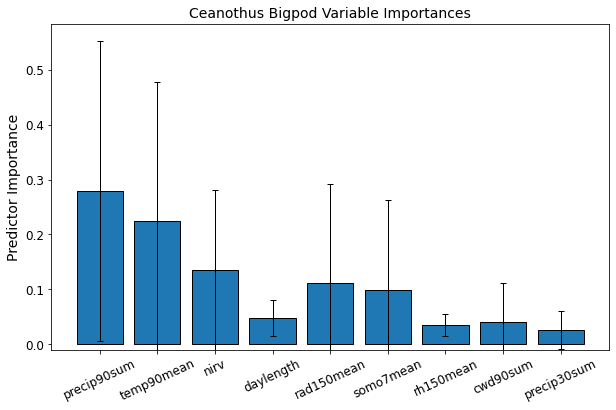

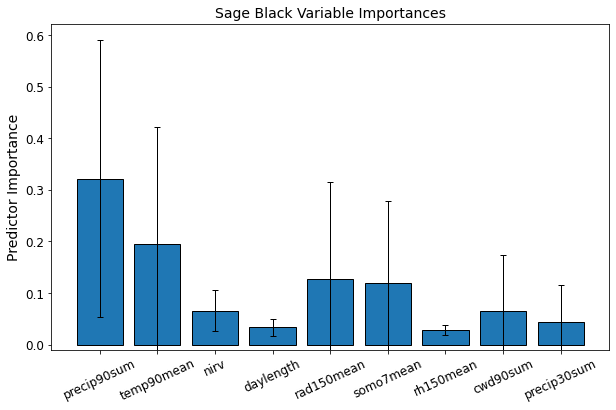

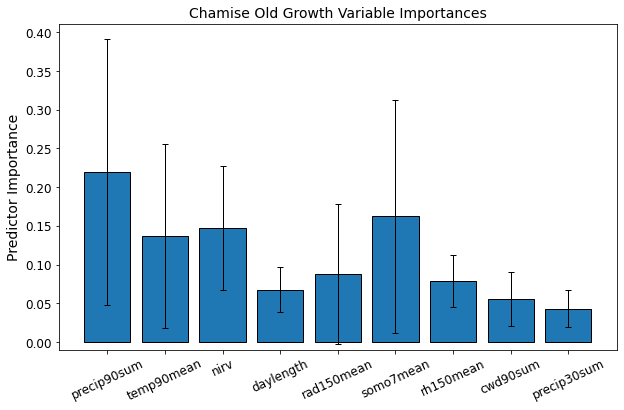

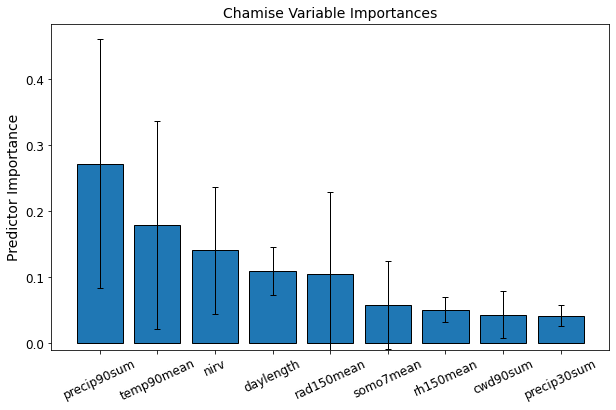

In [21]:
# Create fuel specific importance value bar charts
for fuel_type in fuels:
    plt.figure(figsize=(10,6))
    #plt.style.use('fivethirtyeight')
    # list of x locations for plotting
    x_values = list(range(len(importances)))

    # Option to calculate bottom values to see full range of error bars
    #bottom_values = [max(0, feat_importances['importance'].iloc[i] - feat_importances['error'].iloc[i]) for i in range(len(feat_importances))]
    
    # Define error bar style
    error_config = {'lw': 1, 'capsize': 3, 'capthick': 1}

    # Create bar chart
    plt.bar(x_values, feat_importances[f'{fuel_type}_importance'], orientation = 'vertical',
            yerr=feat_importances[f'{fuel_type}_error'], linewidth=1, edgecolor='black', 
            error_kw=error_config)
    # Additional parameters
    plt.xticks(x_values, feat_importances.index, rotation=25, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(bottom=-0.01)
    plt.ylabel('Predictor Importance', fontsize=14); plt.title(fuel_type.replace('_',' ').title() + ' Variable Importances', fontsize=14);
    
    plt.savefig(output_path + fuel_type + '_importances.png', bbox_inches='tight')